### 1a)
Пространство фичей разбивается на две части: $\le a$ и $\geq a$
Тогда максимальное число разбиений $n-1$, где n - число точек.
Еще два тривиальных, когда все больеш или все меньше.
Итого, $m_h(n)=n+1$, $BP=2$, $d_{VC}(h)=1$

### 1б)
Аналогично предыдущему, только теперь надо в отстортированный список
по значению фичи поставить точки $a$ и $b$.
И еще одно, когда между $a$ и $b$ ничего не попало.
Итого, $m_h(n)=\frac{(n+1)n}{2}+1$, $BP=3$, $d_{VC}(h)=2$

In [50]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.model_selection import train_test_split
data_folder = "../models/"

In [51]:
def read_data(csv_name):
    data = pd.read_csv(data_folder + csv_name)
    values, labels = data.drop(columns=['label']), data.label
    return values.values, labels.values

In [109]:
blobs2_values, blobs2_labels = read_data("blobs2.csv")

In [52]:
def split_dataset(values, labels):
    values_train, values_test, labels_train, labels_test = train_test_split(values, labels, train_size=0.8)  
    return values_train, values_test, labels_train, labels_test


In [111]:
def split_dataset_poly(values, labels, deg):
    values_train, values_test, labels_train, labels_test = train_test_split(values, labels, train_size=0.8)  
    return PolynomialFeatures(degree=deg).fit_transform(values_train),\
           PolynomialFeatures(degree=deg).fit_transform(values_test),\
           labels_train,\
           labels_test

In [112]:
def pocket(deg, epochs):
    def h(w_inner, x_inner):
        return 0 if np.sign(w_inner @ x_inner) < 0 else 1
    values_train, values_test, labels_train, labels_test = split_dataset_poly(blobs2_values, blobs2_labels, deg)
    w = np.random.rand(len(values_train[0]))
    res, min_error = None, None
        
    for _ in range(epochs):
        for val, lab in zip(values_train, labels_train):
            if h(w, val) == lab:
                continue
            w += np.sign(lab - 0.5) * val
            cnt = 0.0
            for val_test, lab_test in zip(values_test, labels_test):
                if h(w, val_test) != lab_test:
                    cnt += 1.0
                    
            err = cnt / len(values_test)
            if min_error is None or err < min_error:
                res = w
                min_error = err
                
    
    return lambda value: h(res, value)


In [9]:
import matplotlib.pyplot as plt

# https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron
def draw(h, degree):
    X, Y = blobs2_values, blobs2_labels
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
    fig, ax = plt.subplots()
    Z = np.array([h(x) for x in PolynomialFeatures(degree=degree).fit_transform(np.c_[xx.ravel(), yy.ravel()])])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.spring, alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.spring, s=15, edgecolors='k')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

F:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


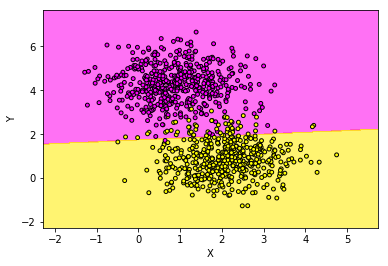

In [114]:
def task2():
    h = pocket(1, 100)
    draw(h, 1)
    
task2()


F:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


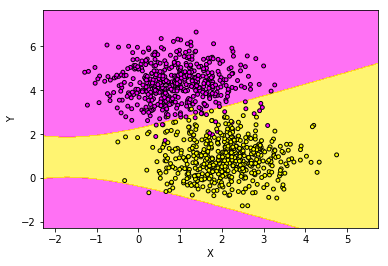

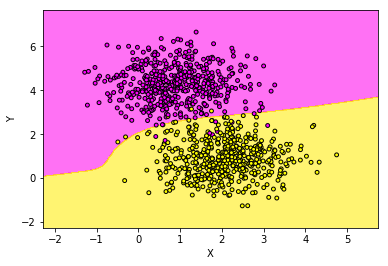

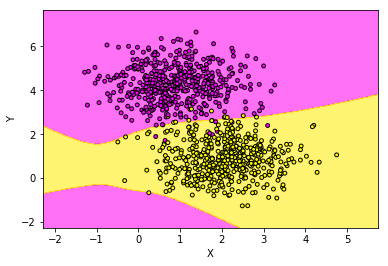

In [117]:
def task3():
    for deg in range(2, 5):
        h = pocket(deg, 100)
        draw(h, deg)
        
task3()


In [12]:
from sklearn.preprocessing import MinMaxScaler
    
def logistic_regression(values, labels, epochs, batch_size):
    values = MinMaxScaler().fit_transform(values)
    mark = labels[0]
    labels = list(map(lambda lab: -1 if lab == mark else 1, labels))
    w = np.random.rand(len(values[0]))
    batches_count = (len(values) + batch_size - 1) // batch_size
    res = []
    
    for i in range(epochs):
        for j in range(batches_count):
            batch = range(batch_size * j, min(batch_size * (j + 1), len(values)))
            s = 0
            for k in batch:
                s += labels[k] * values[k] / (1 + np.exp(labels[k] * (w @ values[k])))
            
            w += s / len(batch)
        
        res.append(np.mean(np.array([-1 if 1 / (1 + np.exp(-(w @ val))) < 0.5 else 1 for val in values]) == labels))
    return res


In [13]:

def draw_regr(res):
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.plot(list(range(len(res))), res)
    plt.show()


In [14]:
def read_data(csv_name):
    data = pd.read_csv(data_folder + csv_name)
    values, labels = data.drop(columns=['label']), data.label
    return values.values, labels.values


In [15]:
spam_values, spam_labels = read_data("spam.csv")
cancer_values, cancer_labels = read_data("cancer.csv")


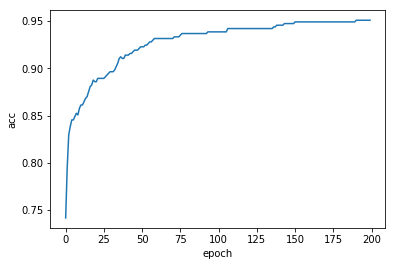

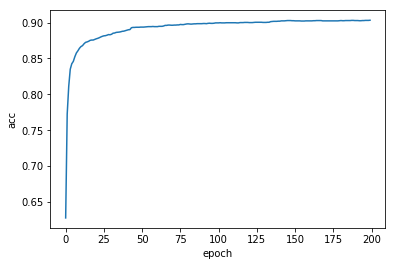

In [17]:
def task4_spam():
    epochs = 200
    batch_size = 32
    acc = logistic_regression(spam_values, spam_labels, epochs, batch_size)
    draw_regr(acc)

def task4_cancer():
    epochs = 200
    batch_size = 32
    acc = logistic_regression(cancer_values, cancer_labels, epochs, batch_size)
    draw_regr(acc)

task4_cancer()
task4_spam()


In [59]:
import torch


In [60]:
def load_mnist():
    mnist_values, mnist_labels = read_data("mnist.csv")
    mnist_values = torch.tensor(mnist_values, dtype=torch.float).view(mnist_values.shape[0], 1, 28, 28)
    mnist_labels = torch.tensor(mnist_labels, dtype=torch.long)
    return mnist_values, mnist_labels


In [61]:
from skimage import io
import os
from pathlib import Path

def load_notmnist():
    root = data_folder + "notMNIST_small/"
    
    notmnist_values_train, notmnist_values_test, notmnist_labels_train, notmnist_labels_test = None, None, None, None
    for i, letter in enumerate(os.listdir(root)):
        cur_notmnist_values = np.array([io.imread(img) for img in Path(root + letter).iterdir() if img.stat().st_size > 0], dtype=np.float)
        cur_notmnist_labels = np.array([i] * cur_notmnist_values.shape[0])
        
        cur_notmnist_values_train, cur_notmnist_values_test, cur_notmnist_labels_train, cur_notmnist_labels_test = split_dataset(cur_notmnist_values, cur_notmnist_labels)
        
        if notmnist_values_train is None:
            notmnist_values_train, notmnist_labels_train = cur_notmnist_values_train, cur_notmnist_labels_train
            notmnist_values_test, notmnist_labels_test = cur_notmnist_values_test, cur_notmnist_labels_test
        else:
            notmnist_values_train, notmnist_labels_train = np.vstack((notmnist_values_train, cur_notmnist_values_train)), np.hstack((notmnist_labels_train, cur_notmnist_labels_train))
            notmnist_values_test, notmnist_labels_test = np.vstack((notmnist_values_test, cur_notmnist_values_test)), np.hstack((notmnist_labels_test, cur_notmnist_labels_test))
    
    notmnist_values_train = torch.tensor(notmnist_values_train, dtype=torch.float).view(notmnist_values_train.shape[0], 1, 28, 28)
    notmnist_values_test = torch.tensor(notmnist_values_test, dtype=torch.float).view(notmnist_values_test.shape[0], 1, 28, 28)
    notmnist_labels_train = torch.tensor(notmnist_labels_train, dtype=torch.long)
    notmnist_labels_test = torch.tensor(notmnist_labels_test, dtype=torch.long)
    
    return notmnist_values_train, notmnist_values_test, notmnist_labels_train, notmnist_labels_test



In [65]:
mnist_values, mnist_labels = load_mnist()
notmnist_values_train, notmnist_values_test, notmnist_labels_train, notmnist_labels_test = load_notmnist()


F:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


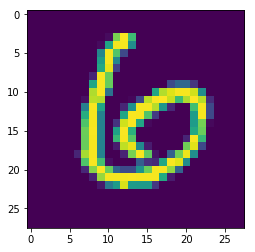

In [66]:
plt.imshow(mnist_values[11][0])


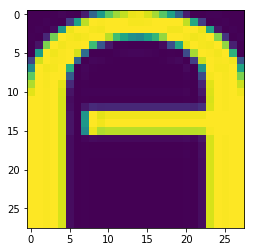

In [67]:
plt.imshow(notmnist_values_train[11][0])